# STOCK PRICE PREDICTION USING LSTM


### IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

### 1)What was the change in price of the stock overtime?

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [9]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-05-21,3256.689941,3197.010010,3250.000000,3203.080078,4104900.0,3203.080078,AMAZON
2021-05-24,3257.949951,3210.500000,3215.500000,3244.989990,2422800.0,3244.989990,AMAZON
2021-05-25,3279.820068,3213.760010,3266.669922,3259.050049,3261100.0,3259.050049,AMAZON
2021-05-26,3295.729980,3258.510010,3274.590088,3265.159912,2384000.0,3265.159912,AMAZON
2021-05-27,3260.360107,3230.040039,3256.000000,3230.110107,2561200.0,3230.110107,AMAZON
2021-05-28,3247.989990,3219.699951,3242.000000,3223.070068,2329800.0,3223.070068,AMAZON
2021-06-01,3250.979980,3209.060059,3243.500000,3218.649902,2430000.0,3218.649902,AMAZON
2021-06-02,3235.000000,3208.000000,3223.100098,3233.989990,2014500.0,3233.989990,AMAZON
2021-06-03,3214.439941,3184.030029,3204.229980,3187.010010,2398300.0,3187.010010,AMAZON


In [10]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,119.990899,116.912253,118.562214,118.470751,1.260483e+08,118.063591
std,14.172811,13.939579,14.186054,14.020402,5.353946e+07,14.134136
min,81.404999,80.195000,80.837502,80.580002,4.669130e+07,80.040680
25%,115.370003,112.199997,113.910004,113.160004,8.884460e+07,112.605286
50%,123.209999,119.680000,121.410004,121.209999,1.119326e+08,121.004463
75%,129.720001,126.760002,128.500000,127.900002,1.519481e+08,127.683121
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [11]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-06-04 to 2021-06-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


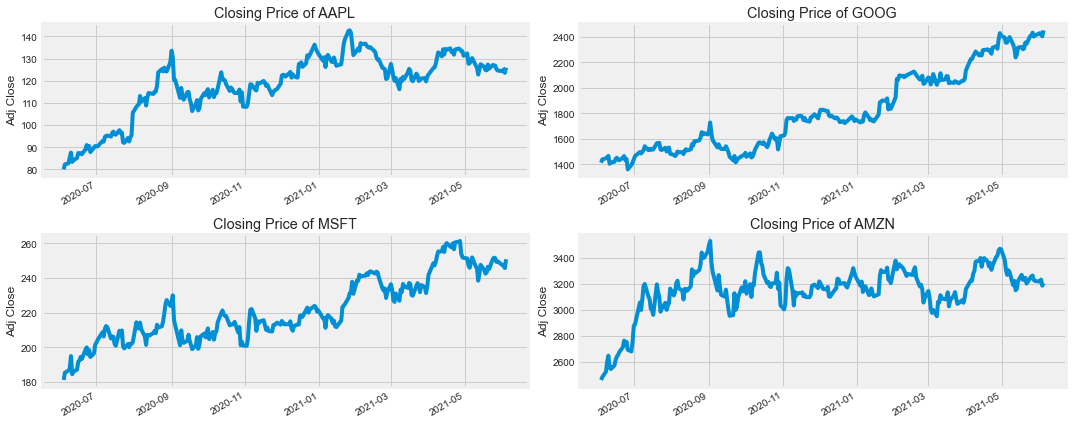

In [12]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

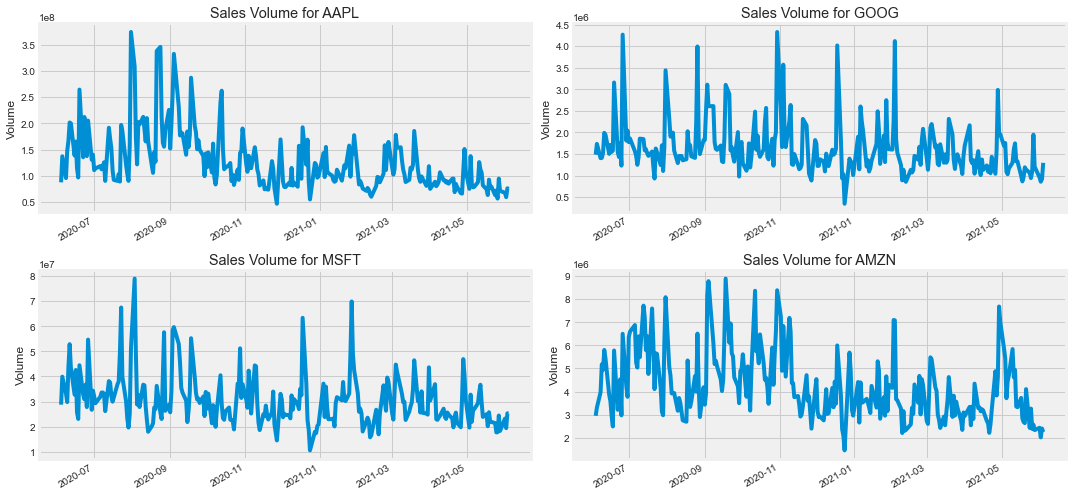

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

#### 2) What was the moving average of the various stocks?

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

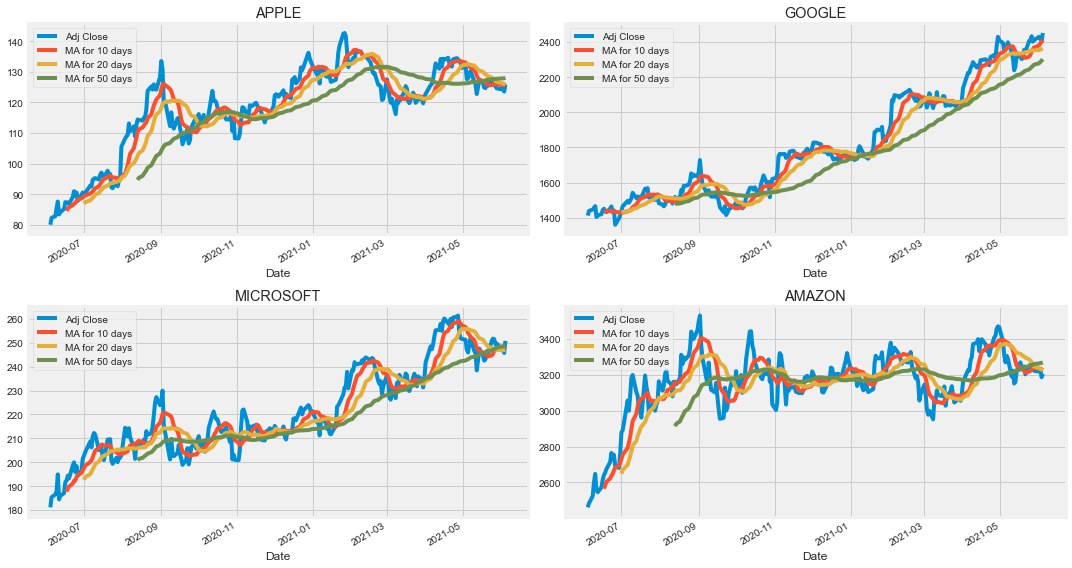

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


#### 3) What was the daily return of the stock on average?

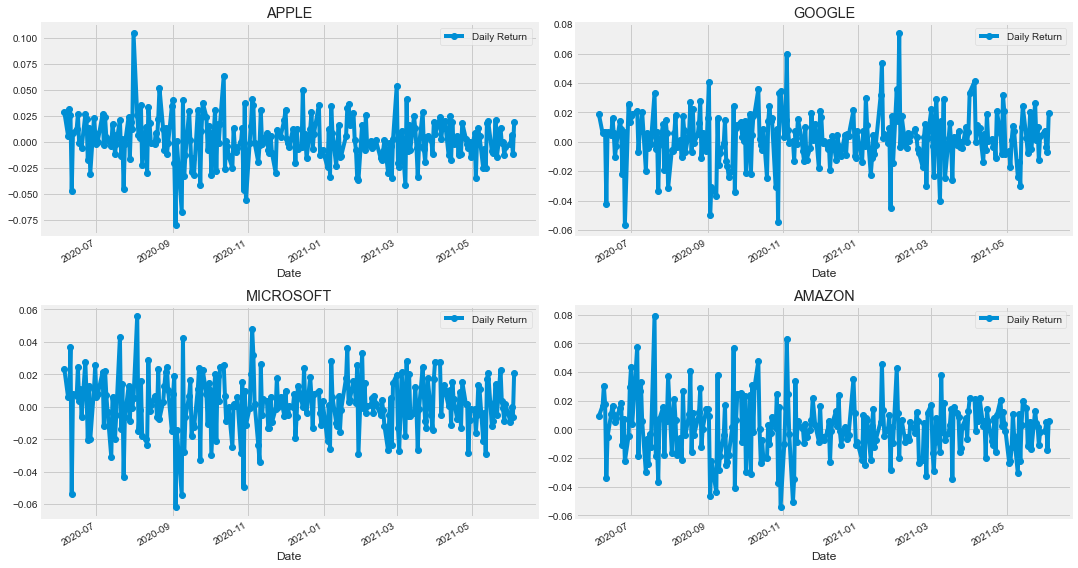

In [18]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

C:\Users\S P Akhilaa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\S P Akhilaa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\S P Akhilaa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

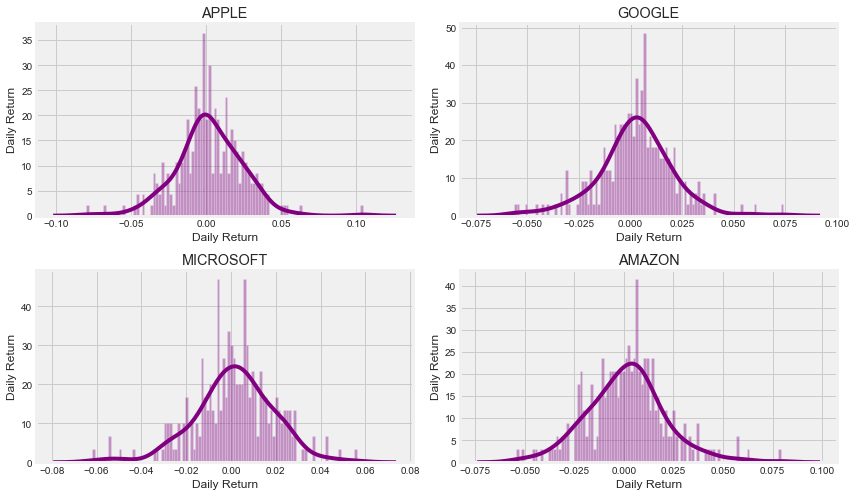

In [19]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

#### 4) What was the correlation between different stocks closing prices?

###### Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [20]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-04,80.040680,1412.180054,181.165863,2460.600098
2020-06-05,82.320328,1438.390015,185.404800,2483.000000
2020-06-08,82.807037,1446.609985,186.553680,2524.060059
2020-06-09,85.421921,1456.160034,187.979889,2600.860107
2020-06-10,87.619614,1465.849976,194.952362,2647.449951


###### Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [21]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-04,NaN,NaN,NaN,NaN
2020-06-05,0.028481,0.018560,0.023398,0.009103
2020-06-08,0.005912,0.005715,0.006197,0.016536
2020-06-09,0.031578,0.006602,0.007645,0.030427
2020-06-10,0.025728,0.006654,0.037092,0.017913


###### Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

C:\Users\S P Akhilaa\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


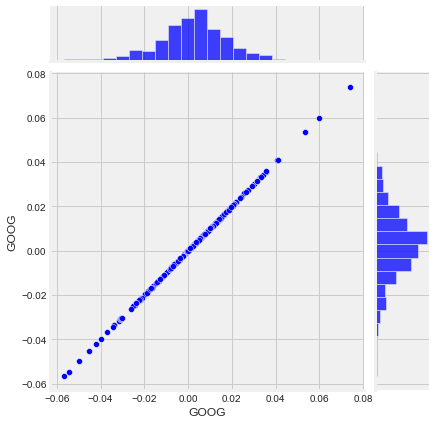

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='blue')

C:\Users\S P Akhilaa\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


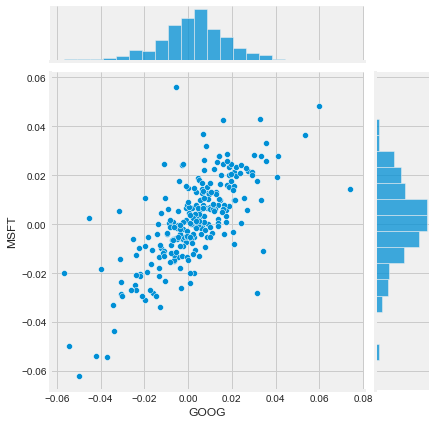

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

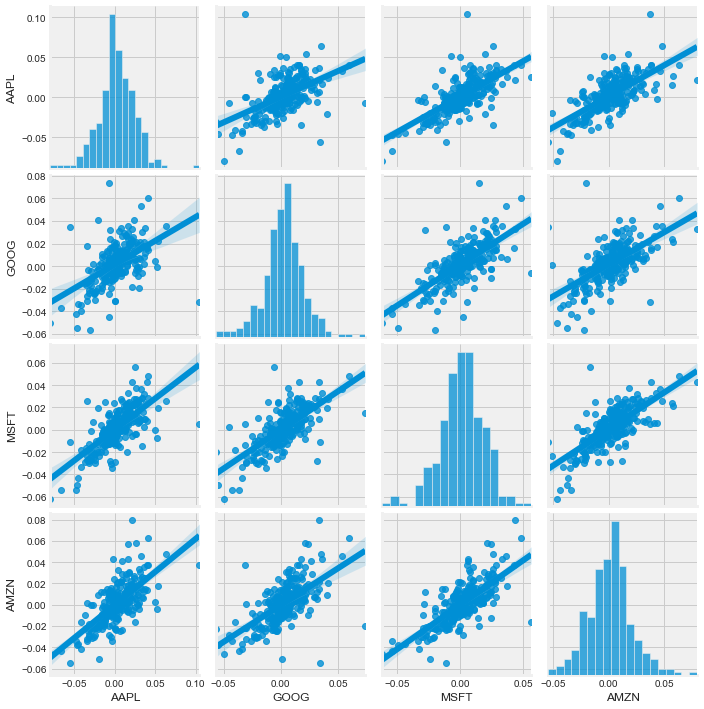

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

###### Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

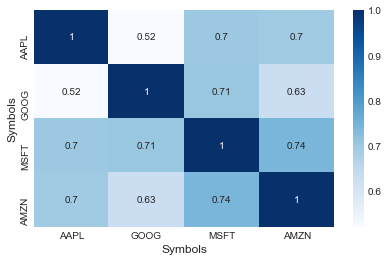

In [29]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='Blues')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

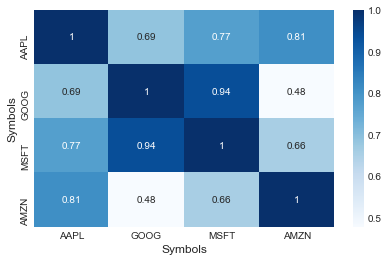

In [30]:
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')

###  5) Predicting the closing price stock price of APPLE inc:

In [31]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-28,125.800003,124.550003,125.570000,124.610001,71311100.0,124.610001
2021-06-01,125.349998,123.940002,125.080002,124.279999,67637100.0,124.279999
2021-06-02,125.239998,124.050003,124.279999,125.059998,59278900.0,125.059998


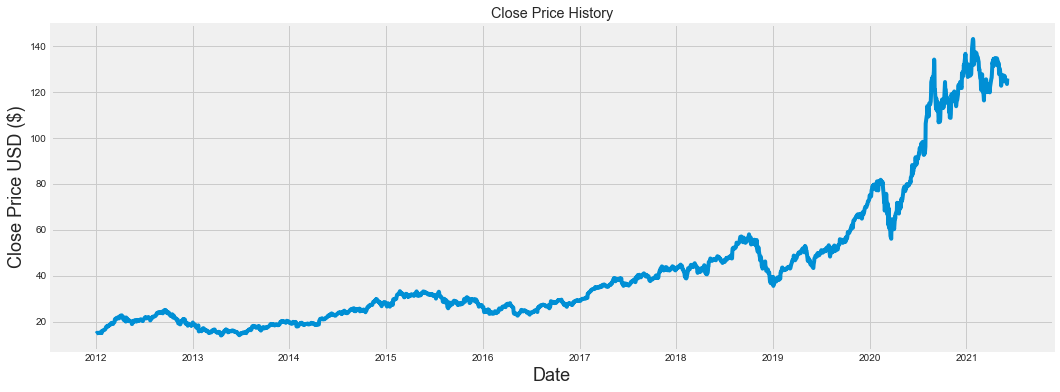

In [32]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [33]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2253

In [34]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.85992063],
       [0.84815709],
       [0.86634417]])

In [35]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2193/2193 [==============================] - 93s 43ms/step - loss: 0.0015


In [37]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.176285611468248

C:\Users\S P Akhilaa\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


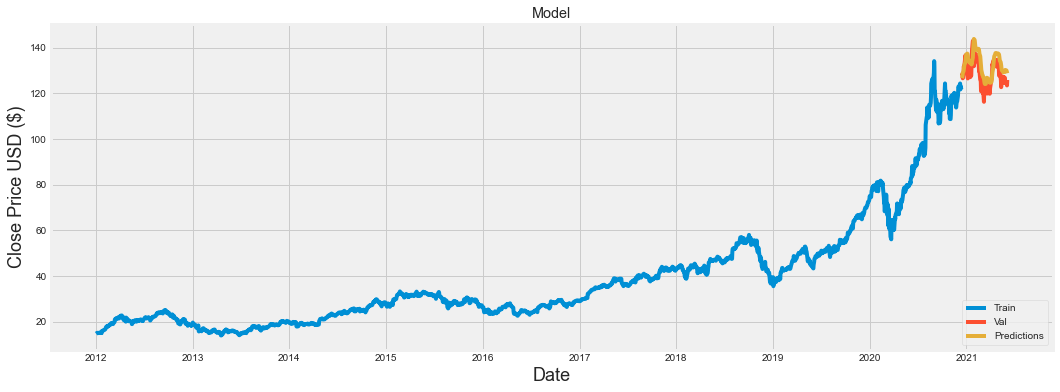

In [38]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-12-15,127.879997,126.758698
2020-12-16,127.809998,127.138924
2020-12-17,128.699997,127.904488
2020-12-18,126.660004,128.940109
2020-12-21,128.229996,129.766815
...,...,...
2021-05-28,124.610001,130.309677
2021-06-01,124.279999,130.076981
2021-06-02,125.059998,129.677780
